In [1]:
%pylab inline

pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure"
pathchow='/home/jfm343/Documents/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'

import numpy as np
import pandas as pd
import os
import sys

mach='Mac'

if mach=='Mac':
    pathy=pathMAC
    path_data=pathy+'/data'
    sys.path.insert(0, pathy+'/Mods_disp')
    sys.path.insert(0, pathy+'/Mods_corr')
if mach=='pc':
    pathy=pathpc
    path_data=pathy+'/data'
    sys.path.insert(0, pathy+'/Mods_disp')
    sys.path.insert(0, pathy+'/Mods_corr')

import Dispersion
import MoireLattice
from scipy import linalg as la
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from SCF_M_point import Mean_field_M
import pickle
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=True)
import Eq_time_corrs_M_MF

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
Nsamp=4
theta=1.05*np.pi/180  # magic angle
c6sym=True
umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one is normalized
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0019559860229492188  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (16, 1)
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0018069744110107422  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling r

In [3]:

fullpath=path_data+'/g3_12_2023-04-11-18-56-55/g3_12_1.05/data_mu_0_g2_3.pkl'
# Read the object from the pickle file
with open(fullpath, 'rb') as file:
    B1 = pickle.load(file)


In [4]:


# import importlib     
# importlib.reload(Eq_time_corrs_M_MF) #

In [5]:
trans_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 'a', 'trans', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
the shape of the index qpM array (72, 17) compare to  72
the shape of the index qpM array (72, 17) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
7 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
calculating ten

In [6]:

phiT=0
T=0.001
res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 7.986973285675049


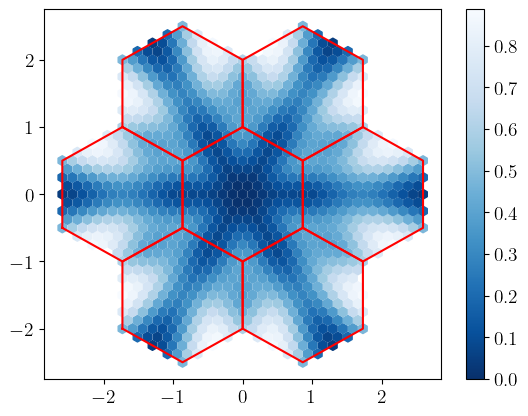

In [7]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [8]:
phiT=0.1
T=0.0
res_tv2=trans_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.19889211654663086


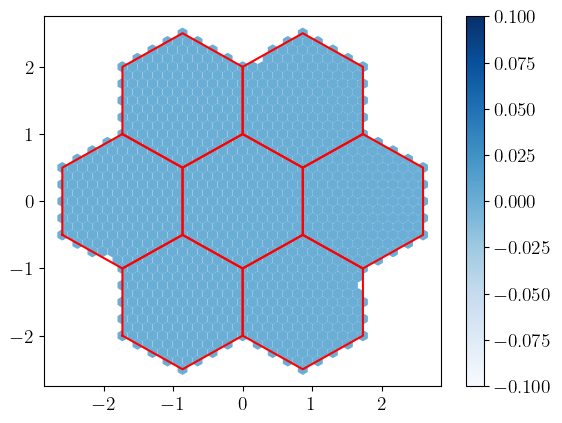

In [9]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [10]:
phiT=0.1
T=0.0
res_tv2=trans_corr.MF_corr_eq_back( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.1270771026611328


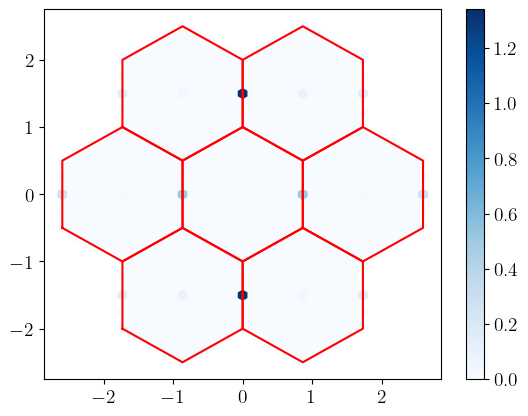

In [11]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [21]:
phiT=1
T=0.0
res_tv2=trans_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.10363411903381348


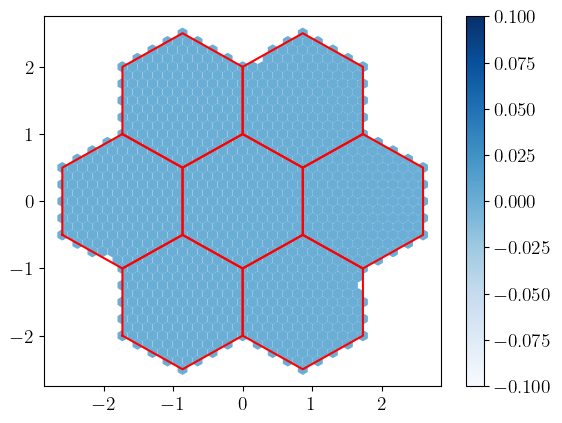

In [22]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [14]:
phiT=1
T=0.001
res_phi_trans=[]
res_phi_trans_back=[]
Phis=np.linspace(0,0.1, 64)
for phiT in Phis:
    # res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    # res_phi_trans.append(res_t)
    
    res_t=trans_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )
    res_phi_trans_back.append(res_t)

starting bubble.......
time for bubble... 0.10160017013549805
starting bubble.......
time for bubble... 0.10250020027160645
starting bubble.......
time for bubble... 0.10168290138244629
starting bubble.......
time for bubble... 0.0976409912109375
starting bubble.......
time for bubble... 0.10010385513305664
starting bubble.......
time for bubble... 0.1040492057800293
starting bubble.......
time for bubble... 0.09727716445922852
starting bubble.......
time for bubble... 0.09838700294494629
starting bubble.......
time for bubble... 0.11261796951293945
starting bubble.......
time for bubble... 0.10051894187927246
starting bubble.......
time for bubble... 0.09799814224243164
starting bubble.......
time for bubble... 0.10383796691894531
starting bubble.......
time for bubble... 0.10301685333251953
starting bubble.......
time for bubble... 0.09901094436645508
starting bubble.......
time for bubble... 0.1047370433807373
starting bubble.......
time for bubble... 0.09873104095458984
starting bu

In [15]:
# fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20,20), layout="constrained")


# bs=lq.boundary()
# [GM1,GM2]=lq.GMvec
# mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
# for i,phiT in enumerate(Phis):
#     row = int( i % 4)
#     col = int( (i - row) / 4 )
#     for mult in mults:
#         axs[row, col].plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

    
#     axs[row, col].set_title(r'$\phi=$'+str(phiT))
#     # plt.scatter(B1.latt.KX,B1.latt.KY, c=res_phi_trans[i]+np.real(res_phi_trans_back[i]), marker='h', s=50, cmap='Blues_r')
#     sc=axs[row, col].scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_phi_trans_back[i]), marker='h', s=50, cmap='Blues')
#     plt.colorbar(sc, ax = axs[row, col])
# plt.show()

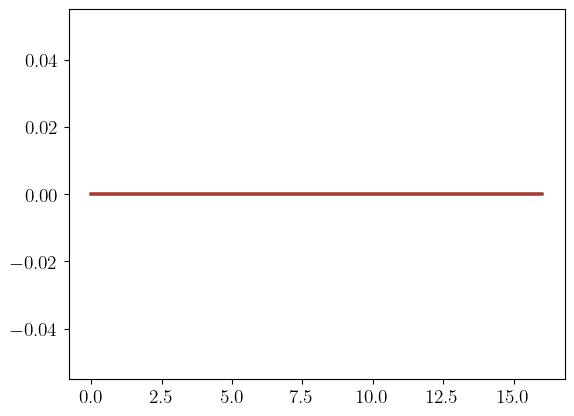

-2.598076211353314 -3.1086244689504383e-15
-1.7320508075688752 -1.5000000000000033
-1.7320508075688759 -2.220446049250313e-15
-1.7320508075688763 1.4999999999999991
-0.8660254037844393 -1.4999999999999996
-0.8660254037844379 -1.1102230246251565e-15
-0.8660254037844384 1.5000000000000002
2.220446049250313e-16 -1.4999999999999987
0.0 0.0
-2.886579864025407e-15 1.5
0.8660254037844395 -1.4999999999999978
0.8660254037844387 0.0
0.8660254037844358 1.5
1.7320508075688787 -1.499999999999997
1.7320508075688774 0.0
1.7320508075688745 1.5
2.598076211353316 0.0


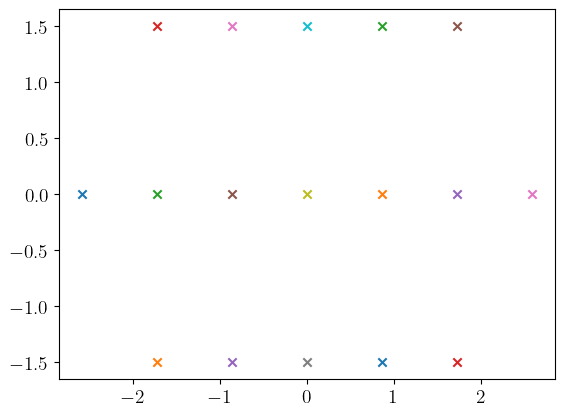

In [16]:


bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
peaks=[]
for i,phiT in enumerate(Phis):

    plt.plot(np.abs(res_phi_trans_back[i])[trans_corr.IGinq])
    peaks.append(np.abs(res_phi_trans_back[i])[trans_corr.IGinq])
plt.show()
for i in trans_corr.IGinq:
    print(B1.latt.KX[i],B1.latt.KY[i])
    plt.scatter([B1.latt.KX[i]],[B1.latt.KY[i]], marker='x')


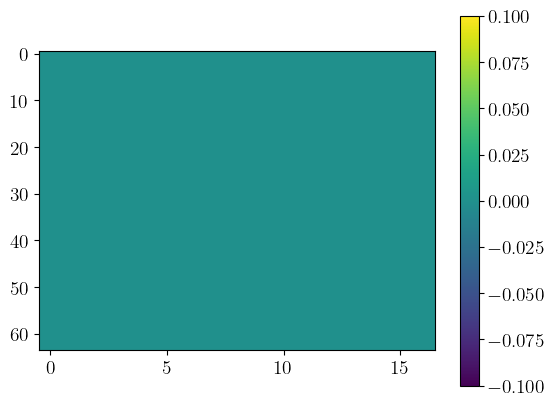

In [17]:
plt.imshow(peaks, aspect=1/5)
plt.colorbar()

In [18]:
phiT=0
T=0.001
res_t0=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 8.056079149246216


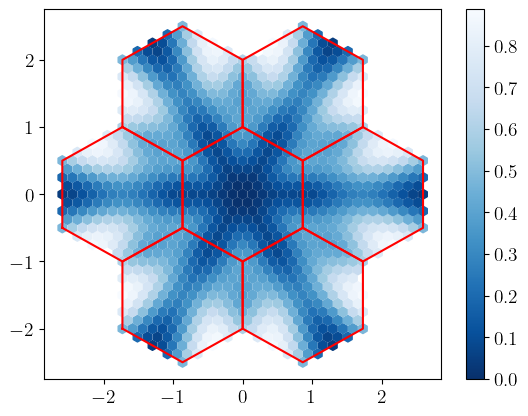

In [18]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t0, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [19]:
phiT=0
T=0.01
res_t02=trans_corr.corr_eq( args = (0.0,T,False) )

starting bubble.......
time for bubble... 3.105715036392212


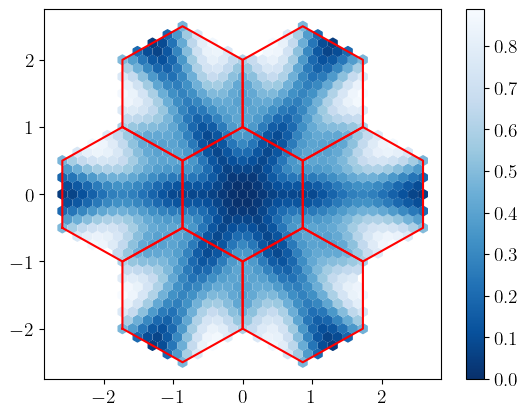

In [20]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t02, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [35]:
subl_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 's', 'subl', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
the shape of the index qpM array (72, 11) compare to  72
the shape of the index qpM array (72, 11) compare to  72
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 11)
11 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (11,)
7 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (11,)
calculating ten

In [36]:
phiT=0
T=0.001
res_subl=subl_corr.MF_corr_eq( args = (0.0,T,phiT, False) )


starting bubble.......
time for bubble... 8.252636909484863


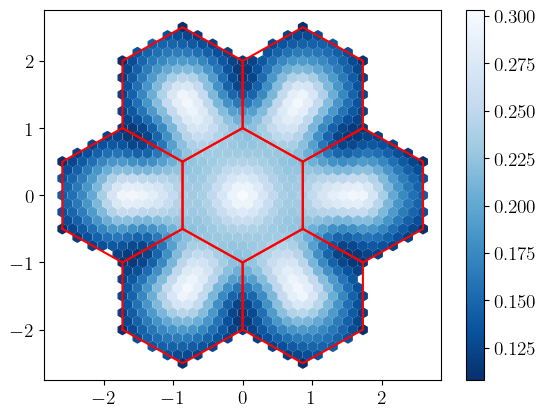

In [37]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_subl, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [38]:
phiT=1
T=0.001
res_subl=subl_corr.MF_corr_eq_v2( args = (0.0,T,phiT, False) )


starting bubble.......
time for bubble... 5.350385904312134


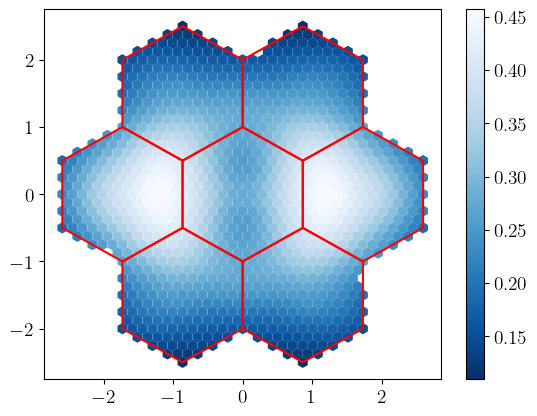

In [39]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_subl, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [46]:
phiT=0.01
T=0.001
res_tv2=subl_corr.MF_corr_eq_back( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.07944703102111816


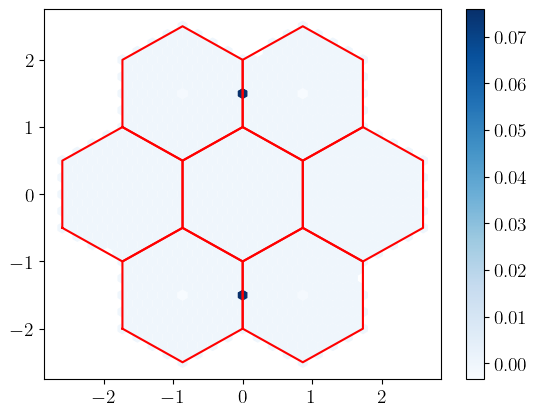

In [47]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [50]:
phiT=1
T=0.001
res_phi_subl=[]
res_phi_subl_back=[]
Phis=np.linspace(0,0.011, 12)
for phiT in Phis:
    # res_subl=subl_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    # res_phi_subl.append(res_subl)
    
    res_subl=subl_corr.MF_corr_eq_back( args = (0.0,T,phiT, False) )
    res_phi_subl_back.append(res_subl)

starting bubble.......
time for bubble... 0.06667518615722656
starting bubble.......
time for bubble... 0.06918621063232422
starting bubble.......
time for bubble... 0.06932497024536133
starting bubble.......
time for bubble... 0.0791318416595459
starting bubble.......
time for bubble... 0.07147789001464844
starting bubble.......
time for bubble... 0.06776309013366699
starting bubble.......
time for bubble... 0.0678410530090332
starting bubble.......
time for bubble... 0.07674384117126465
starting bubble.......
time for bubble... 0.07058405876159668
starting bubble.......
time for bubble... 0.06954288482666016
starting bubble.......
time for bubble... 0.07259678840637207
starting bubble.......
time for bubble... 0.07907700538635254


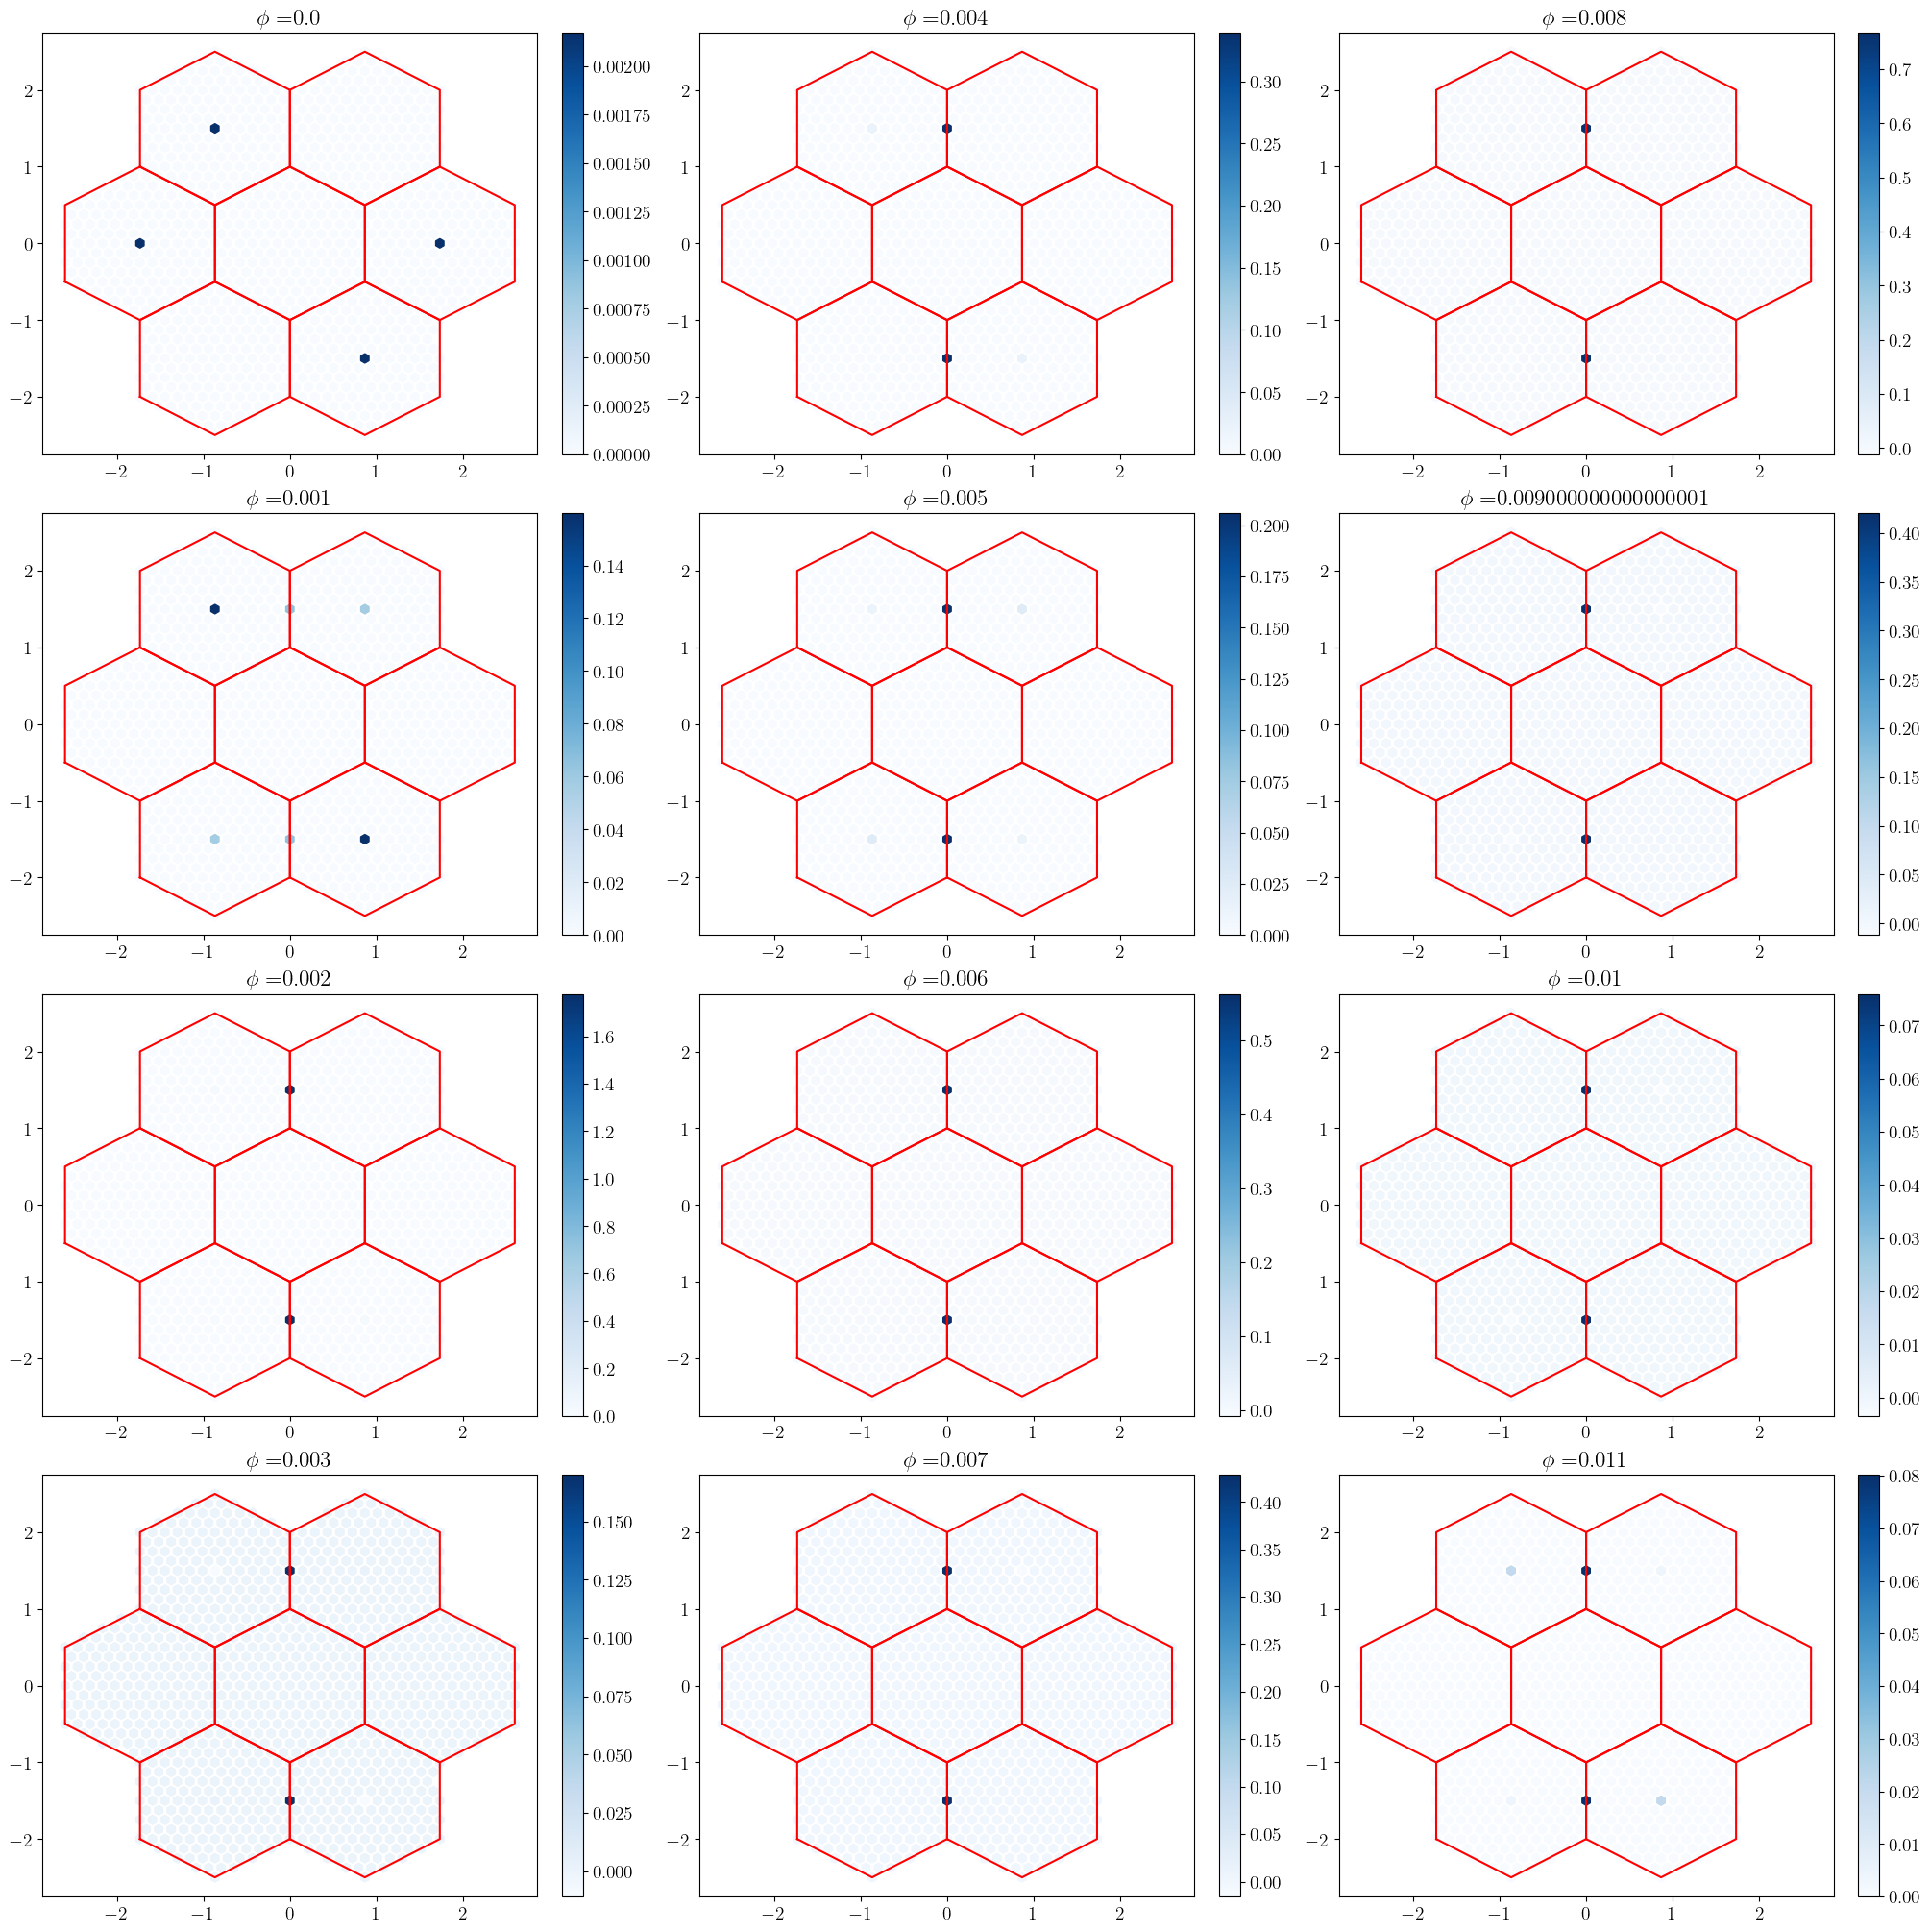

In [51]:
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20,20), layout="constrained")


bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for i,phiT in enumerate(Phis):
    row = int( i % 4)
    col = int( (i - row) / 4 )
    for mult in mults:
        axs[row, col].plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

    axs[row, col].set_title(r'$\phi=$'+str(phiT))
    # plt.scatter(B1.latt.KX,B1.latt.KY, c=res_phi_trans[i]+np.real(res_phi_trans_back[i]), marker='h', s=50, cmap='Blues_r')
    sc=axs[row, col].scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_phi_subl_back[i]), marker='h', s=50, cmap='Blues')
    plt.colorbar(sc, ax = axs[row, col])
plt.show()

In [31]:
phiT=0
T=0.01
res0=subl_corr.MF_corr_eq((0.0,T,phiT, False))

starting bubble.......
time for bubble... 8.128910064697266


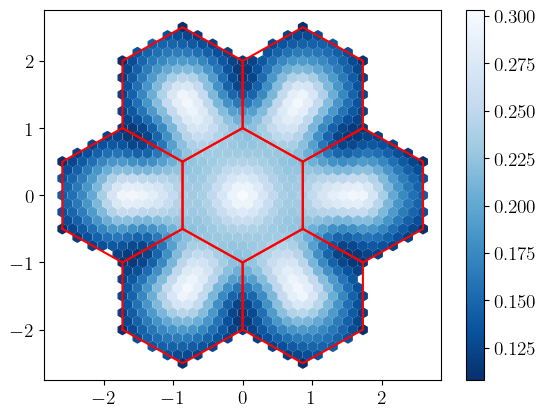

In [32]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res0, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [36]:
long_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 'a', 'long', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
the shape of the index qpM array (72, 17) compare to  72
the shape of the index qpM array (72, 17) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
calculating tensor that stores the overlaps, layer 3, sublattice 1........
finsihed the overlaps.......... 3.23287296295166


In [34]:
phiT=1
T=0.01
resLong=long_corr.MF_corr_eq((0.0,T,phiT, False))

starting bubble.......
time for bubble... 8.757393836975098


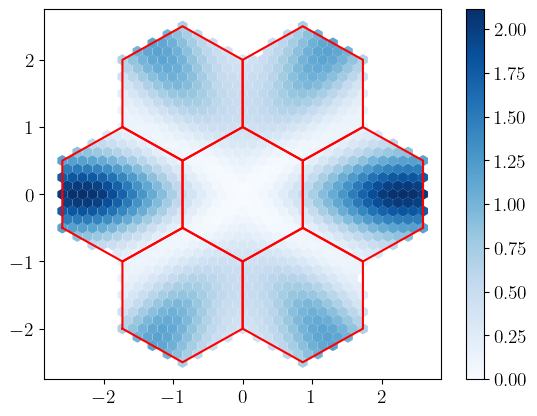

In [35]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=resLong, marker='h', s=50, cmap='Blues')
plt.colorbar()

In [36]:
phiT=0.01
T=0.001
res_tv2=long_corr.MF_corr_eq_back_v3( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.11303520202636719


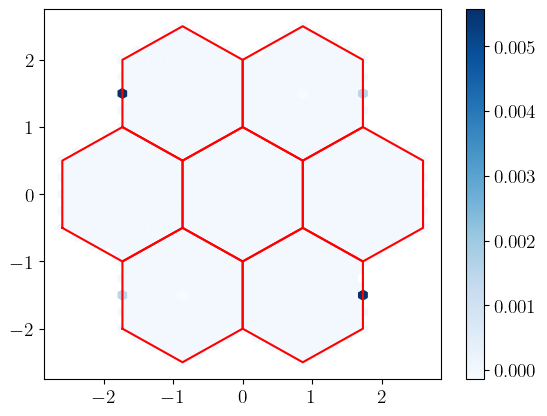

In [37]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

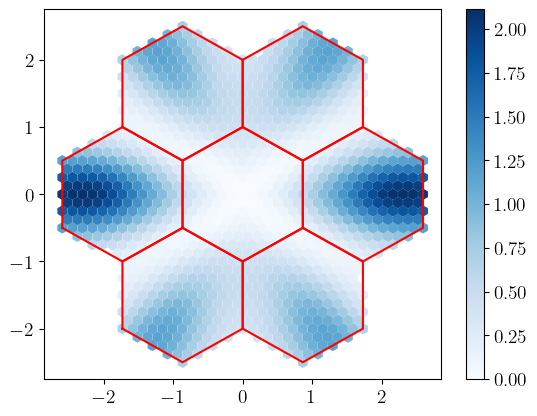

In [38]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=resLong+np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [70]:
phiT=1
T=0.001
res_phi_long=[]
res_phi_long_back=[]
Phis=np.linspace(0,0.01, 11)
for phiT in Phis:
    # res_long=long_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    # res_phi_long.append(res_long)
    
    res_long=long_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )
    res_phi_long_back.append(res_long)

starting bubble.......
time for bubble... 0.10053014755249023
starting bubble.......
time for bubble... 0.11220908164978027
starting bubble.......
time for bubble... 0.11970376968383789
starting bubble.......
time for bubble... 0.12064409255981445
starting bubble.......
time for bubble... 0.11671185493469238
starting bubble.......
time for bubble... 0.11763596534729004
starting bubble.......
time for bubble... 0.12338614463806152
starting bubble.......
time for bubble... 0.11968326568603516
starting bubble.......
time for bubble... 0.11877608299255371
starting bubble.......
time for bubble... 0.11012101173400879
starting bubble.......
time for bubble... 0.1166989803314209


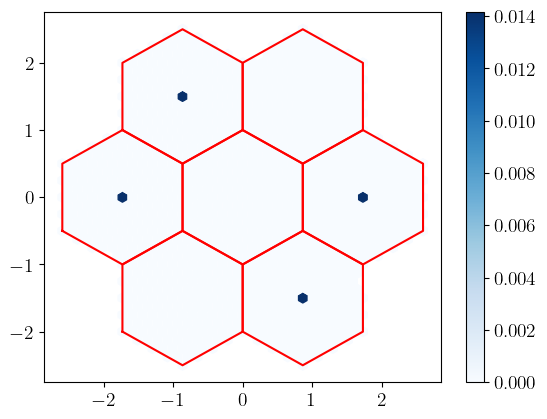

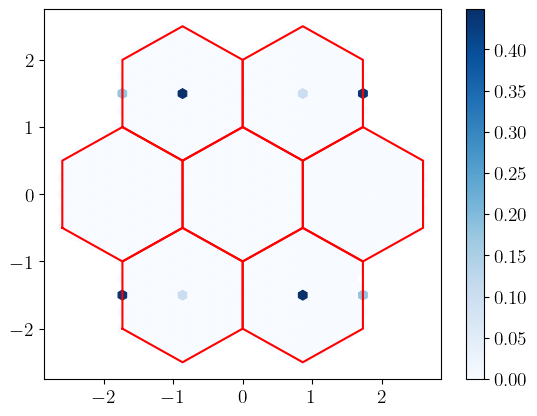

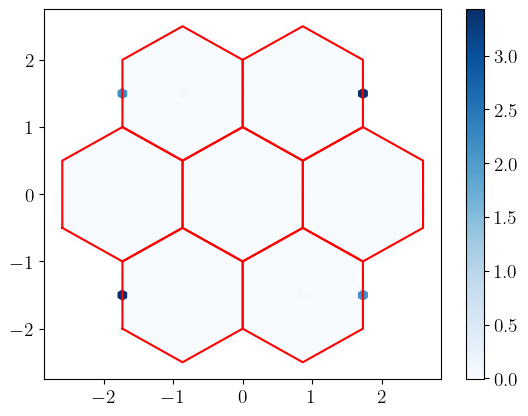

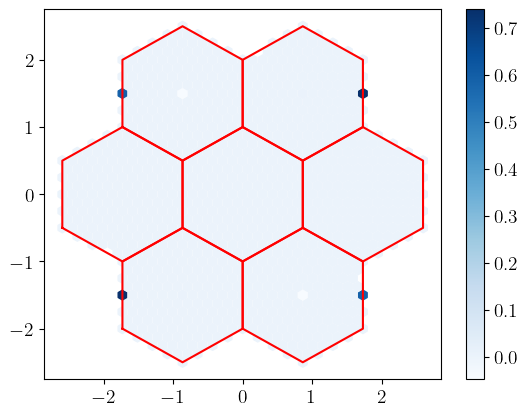

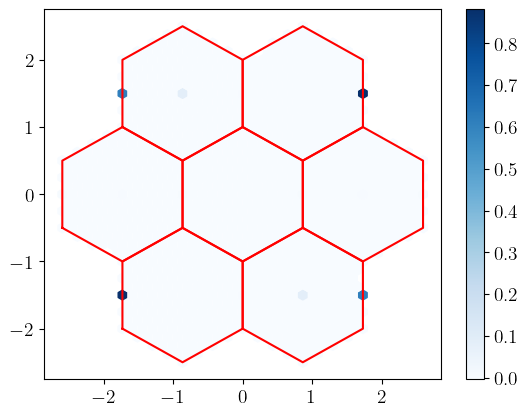

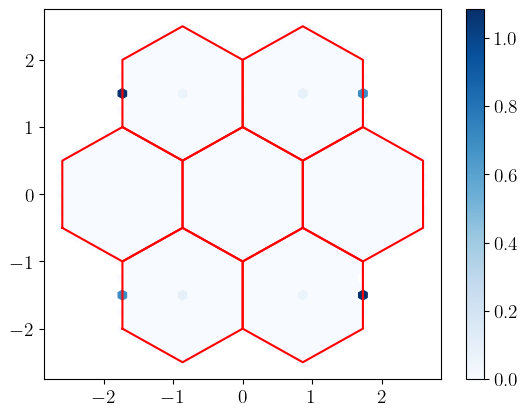

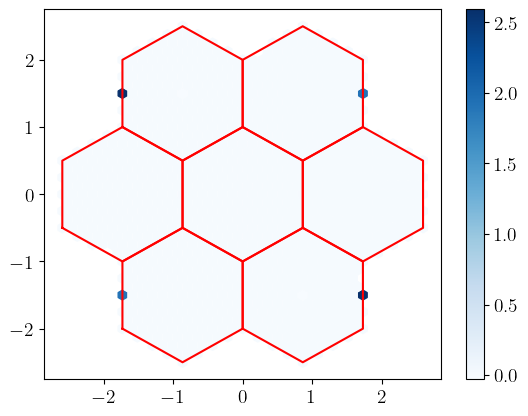

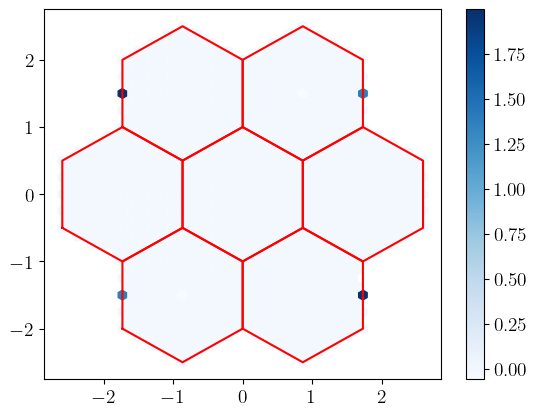

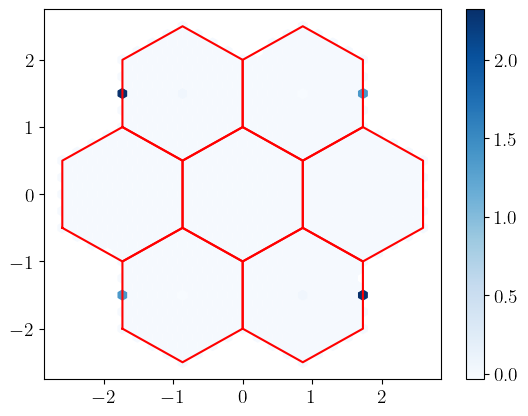

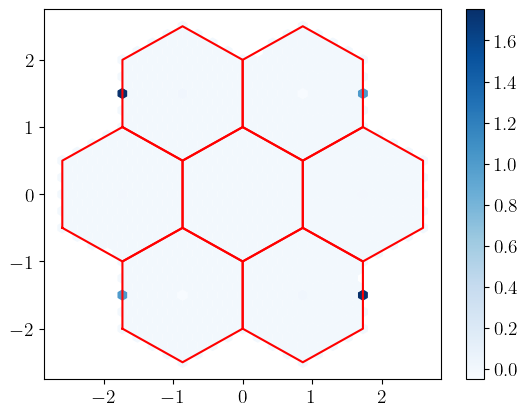

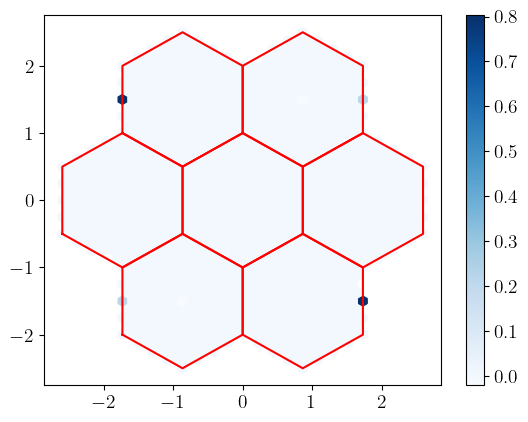

In [71]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for i,phiT in enumerate(Phis):
    for mult in mults:
        plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')


    plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_phi_long_back[i]), marker='h', s=50, cmap='Blues')
    plt.colorbar()
    plt.show()

In [56]:

# import importlib     
# importlib.reload(Eq_time_corrs_M_MF) #

<module 'Eq_time_corrs_M_MF' from '/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure/Mods_corr/Eq_time_corrs_M_MF.py'>

In [62]:
dens_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 's', 'dens', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
the shape of the index qpM array (72, 17) compare to  72
the shape of the index qpM array (72, 17) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
calculating tensor that stores the overlaps, layer 0, sublattice 0........
No insertion in form factors
finsihed the overlap

In [63]:
phiT=0
T=0.01
resden=dens_corr.MF_corr_eq((0.0,T,phiT, False))

starting bubble.......
time for bubble... 7.94171404838562


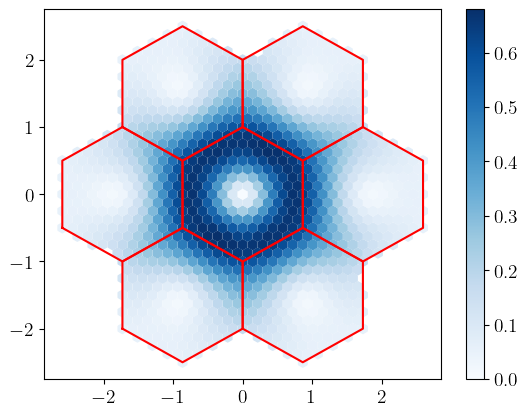

In [64]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=resden, marker='h', s=50, cmap='Blues')
plt.colorbar()

In [65]:
phiT=1
T=0.001
res_phi_den=[]
res_phi_den_back=[]
Phis=np.linspace(0,0.01, 11)
for phiT in Phis:
    # res_long=long_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    # res_phi_long.append(res_long)
    
    res_den=dens_corr.MF_corr_eq_back_v3( args = (0.0,T,phiT, False) )
    res_phi_den_back.append(res_den)

starting bubble.......
time for bubble... 0.09549617767333984
starting bubble.......
time for bubble... 0.09750008583068848
starting bubble.......
time for bubble... 0.10271096229553223
starting bubble.......
time for bubble... 0.10421586036682129
starting bubble.......
time for bubble... 0.09938621520996094
starting bubble.......
time for bubble... 0.10541296005249023
starting bubble.......
time for bubble... 0.11241507530212402
starting bubble.......
time for bubble... 0.10476517677307129
starting bubble.......
time for bubble... 0.10250306129455566
starting bubble.......
time for bubble... 0.10011506080627441
starting bubble.......
time for bubble... 0.09686923027038574


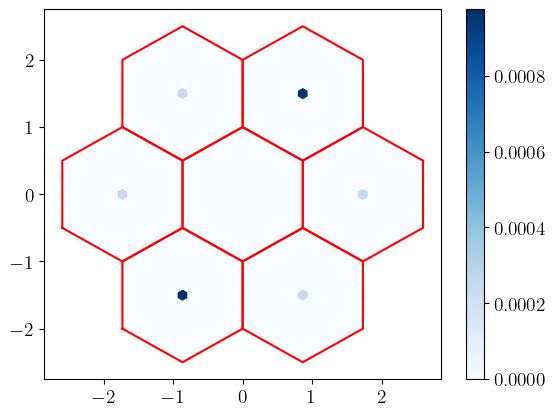

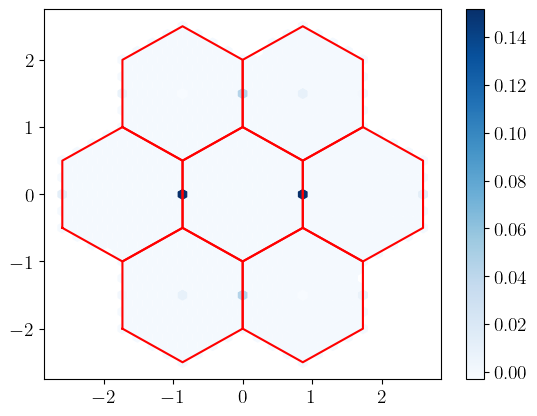

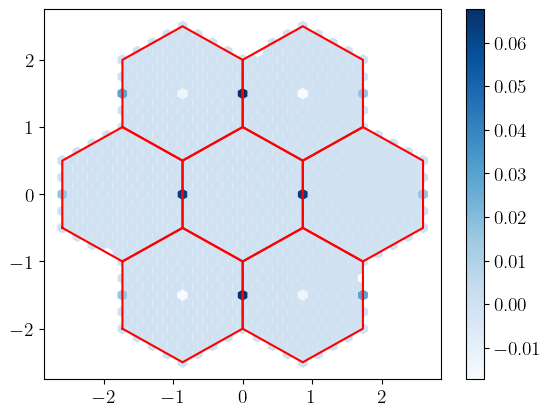

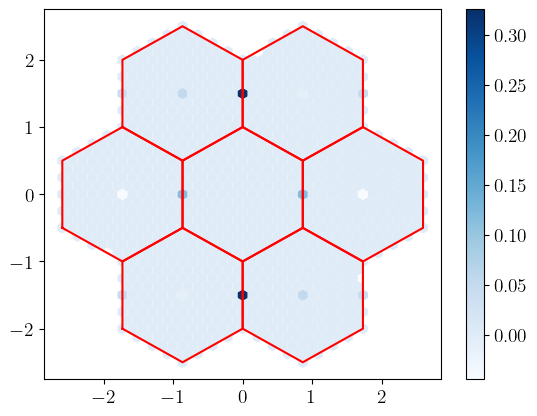

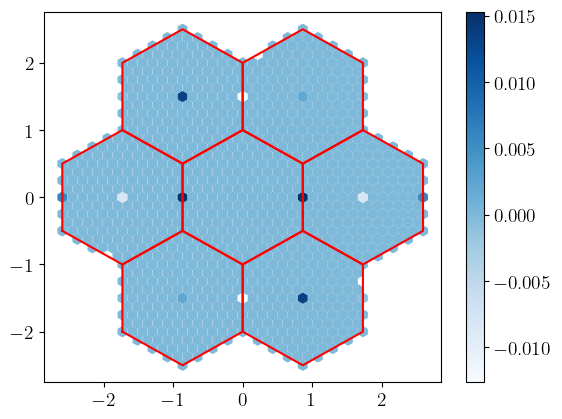

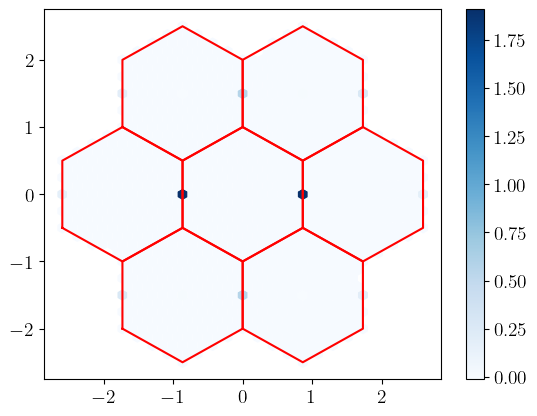

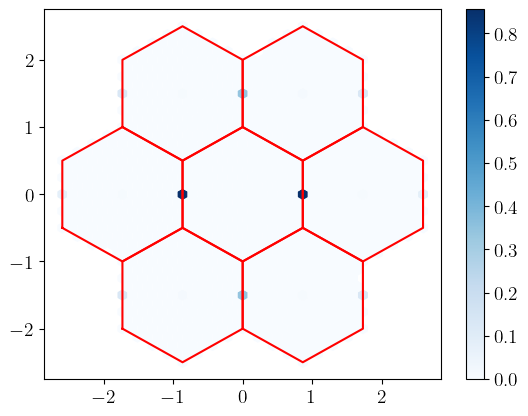

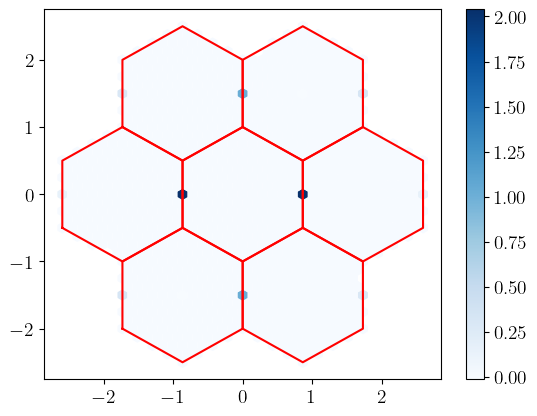

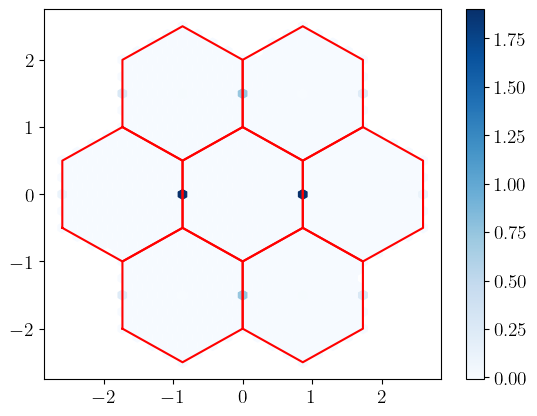

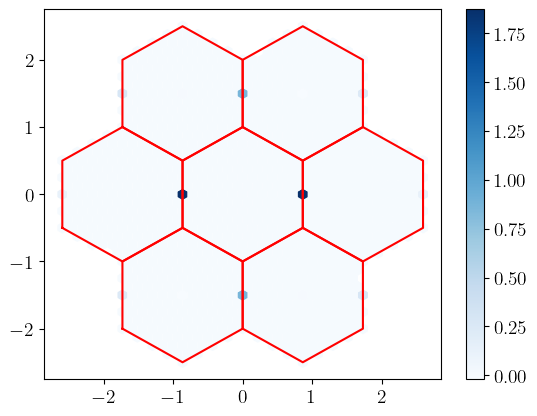

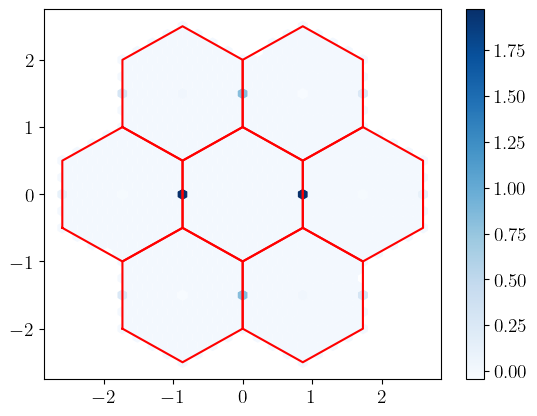

In [66]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for i,phiT in enumerate(Phis):
    for mult in mults:
        plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')


    plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_phi_den_back[i]), marker='h', s=50, cmap='Blues')
    plt.colorbar()
    plt.show()